In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from branches import *
from time import time
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from itertools import chain
from time import time

# MONK 1

## Ordinal

In [2]:
data = np.genfromtxt('../data/monks-1.train', delimiter=' ', dtype=int)
data = data[:, :-1] # Getting rid of the last column, it contains only ids.
data = data[:, ::-1]

print(data.shape)

(124, 7)


In [3]:
encoder = OrdinalEncoder()
encoder.fit(data)
data = encoder.transform(data).astype(int)

In [4]:
lambd = 0.01
alg = Branches(data, encoding='ordinal')

In [5]:
start_time = time()
alg.solve(lambd)
print('Execution time : %.4f' %(time() -start_time))

The search finished after 64 iterations.
Execution time : 0.0236


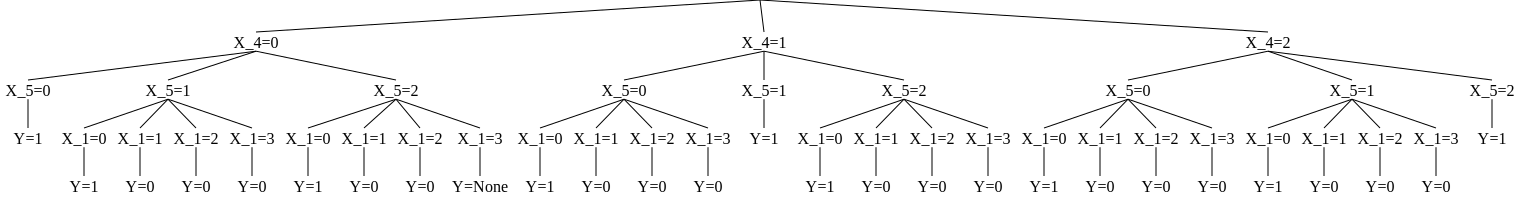

In [6]:
alg.plot_tree()

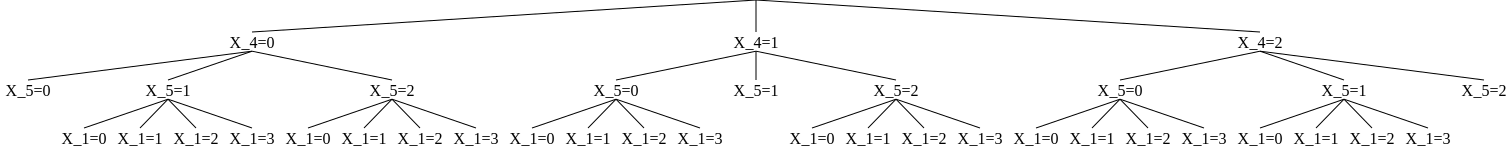

In [7]:
alg.plot_tree(show_classes=False)

In [8]:
branches, splits = alg.lattice.infer()
print('Number of branches :', len(branches))
print('Number of splits :', splits)
print('Accuracy :', ((alg.predict(data[:, :-1]) == data[:, -1]).sum())/alg.n_total)

Number of branches : 27
Number of splits : 10
Accuracy : 1.0


In [9]:
alg.reinitialise()

## Drop Last

In [10]:
data = np.genfromtxt('../data/monks-1.train', delimiter=' ', dtype=int)
data = data[:, :-1] # Getting rid of the last column, it contains only ids.
data = data[:, ::-1]

print(data.shape)

(124, 7)


In [11]:
encoder = OneHotEncoder(drop=np.array([3, 3, 2, 3, 4, 2][::-1]+[0]), sparse_output=False)
encoder.fit(data)
data = encoder.transform(data).astype(int)
print(data.shape)

(124, 12)


In [12]:
lambd = 0.01
alg = Branches(data, encoding='binary')

In [13]:
start_time = time()
alg.solve(lambd)
print('Execution time : %.4f' %(time() -start_time))

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
The search finished after 617 iterations.
Execution time : 0.0921


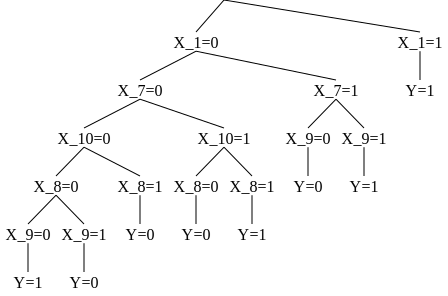

In [14]:
alg.plot_tree()

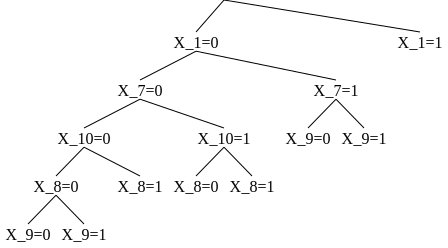

In [15]:
alg.plot_tree(show_classes=False)

In [16]:
branches, splits = alg.lattice.infer()
print('Number of branches :', len(branches))
print('Number of splits :', splits)
print('Accuracy :', ((alg.predict(data[:, :-1]) == data[:, -1]).sum())/alg.n_total)

Number of branches : 8
Number of splits : 7
Accuracy : 1.0


In [17]:
alg.reinitialise()

# Car Evaluation

In [18]:
data = np.genfromtxt('../data/car.data', delimiter=',', dtype=str)
print(data.shape)

(1728, 7)


In [19]:
X, y = data[:, :-1], data[:, -1]
print('Number of classes :', len(set(y)))

Number of classes : 4


In [20]:
encoder_X, encoder_y = OneHotEncoder(drop='first', sparse_output=False), LabelEncoder()
encoder_X.fit(X)
encoder_y.fit(y)
X = encoder_X.transform(X).astype(int)
y = encoder_y.transform(y)

data = np.hstack((X, y.reshape(-1, 1)))
print(data.shape)

(1728, 16)


In [21]:
lambd = 0.005
time_limit = 300
alg = Branches(data, encoding='multi')

In [22]:
start_time = time()
alg.solve(lambd, n=5000000, print_iter=10000, time_limit=time_limit)
print('Execution time : %.4f' %(time() - start_time))

Iteration 10000
Iteration 20000
Iteration 30000
Iteration 40000
Iteration 50000
Iteration 60000
Iteration 70000
Iteration 80000
Iteration 90000
Iteration 100000
Iteration 110000
Iteration 120000
Iteration 130000
Iteration 140000
Iteration 150000
Iteration 160000
Iteration 170000
Iteration 180000
Iteration 190000
Iteration 200000
Iteration 210000
Iteration 220000
Iteration 230000
Iteration 240000
Iteration 250000
Iteration 260000
Iteration 270000
Iteration 280000
Iteration 290000
Iteration 300000
Iteration 310000
The search finished after 312623 iterations.
Execution time : 59.4344


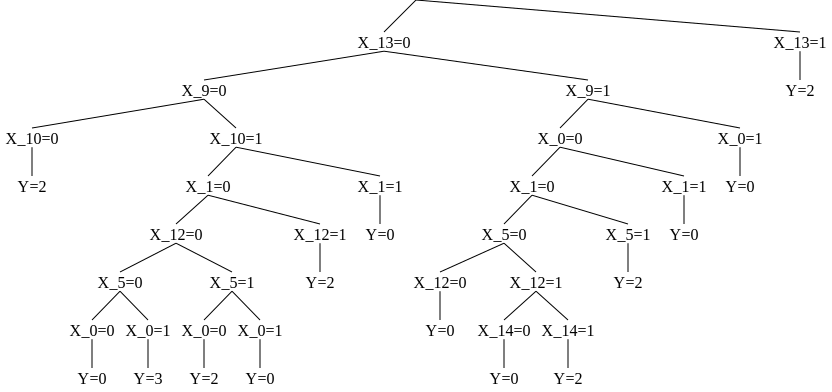

In [23]:
alg.plot_tree()

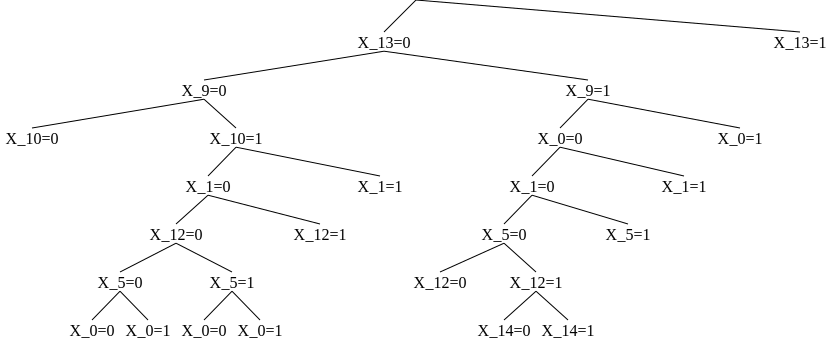

In [24]:
alg.plot_tree(show_classes=False)

In [25]:
branches, splits = alg.lattice.infer()
print('Number of branches :', len(branches))
print('Number of splits :', splits)
print('Accuracy :', ((alg.predict(data[:, :-1]) == data[:, -1]).sum())/alg.n_total)

Number of branches : 14
Number of splits : 13
Accuracy : 0.8611111111111112


In [26]:
alg.reinitialise()